<a href="https://colab.research.google.com/github/quanho114/Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
!pip install -qq scikit-learn==1.2.2
!pip install -qq imbalanced-learn==0.10.1
!pip install -qq palettable

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 5.3 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 6.8 MB/s eta 0:00:00a 0:00:01


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from plotly.subplots import make_subplots
import time
import plotly.graph_objects as go
from matplotlib import rcParams
from textblob import TextBlob
import cufflinks as cf
import math
import warnings
import re
import string
import kagglehub
from kagglehub import KaggleDatasetAdapter
import nltk
import spacy
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from collections import Counter
from palettable.colorbrewer.qualitative import Pastel1_7
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from transformers import BertForSequenceClassification
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from transformers import BertTokenizerFast
from transformers import TFBertModel
from transformers import RobertaTokenizerFast
from transformers import TFRobertaModel
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from transformers import get_linear_schedule_with_warmup
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel
import torch
from sklearn import preprocessing
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from torch.optim import AdamW
from collections import defaultdict
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator

2025-07-13 12:34:17.203686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752410057.416766      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752410057.477153      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Set the path to the file you'd like to load
file_path = "Reviews.csv"
# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "snap/amazon-fine-food-reviews",
  file_path,
)

In [ ]:
df.head().T

,0,1,2,3,4
Id,1,2,3,4,5
ProductId,B001E4KFG0,B00813GRG4,B000LQOCH0,B000UA0QIQ,B006K2ZZ7K
UserId,A3SGXH7AUHU8GW,A1D87F6ZCVE5NK,ABXLMWJIXXAIN,A395BORC6FGVXV,A1UQRSCLF8GW1T
ProfileName,delmartian,dll pa,"Natalia Corres ""Natalia Corres""",Karl,"Michael D. Bigham ""M. Wassir"""
HelpfulnessNumerator,1,0,1,3,0
HelpfulnessDenominator,1,0,1,3,0
Score,5,1,4,2,5
Time,1303862400,1346976000,1219017600,1307923200,1350777600
Summary,Good Quality Dog Food,Not as Advertised,"""Delight"" says it all",Cough Medicine,Great taffy
Text,I have bought several of the Vitality canned d...,Product arrived labeled as Jumbo Salted Peanut...,This is a confection that has been around a fe...,If you are looking for the secret ingredient i...,Great taffy at a great price. There was a wid...


# **EDA & Data Processing**

In [ ]:
df.columns = df.columns.str.replace(r'([a-z])([A-Z])', r'\1_\2', regex=True).str.lower()
df.columns

Index(['id', 'product_id', 'user_id', 'profile_name', 'helpfulness_numerator',
       'helpfulness_denominator', 'score', 'time', 'summary', 'text'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   id                       568454 non-null  int64 
 1   product_id               568454 non-null  object
 2   user_id                  568454 non-null  object
 3   profile_name             568428 non-null  object
 4   helpfulness_numerator    568454 non-null  int64 
 5   helpfulness_denominator  568454 non-null  int64 
 6   score                    568454 non-null  int64 
 7   time                     568454 non-null  int64 
 8   summary                  568427 non-null  object
 9   text                     568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [ ]:
df.isnull().sum()

id                          0
product_id                  0
user_id                     0
profile_name               26
helpfulness_numerator       0
helpfulness_denominator     0
score                       0
time                        0
summary                    27
text                        0
dtype: int64

In [ ]:
df = df.dropna(subset = ['profile_name', 'summary'])
df.isnull().sum()

id                         0
product_id                 0
user_id                    0
profile_name               0
helpfulness_numerator      0
helpfulness_denominator    0
score                      0
time                       0
summary                    0
text                       0
dtype: int64

In [ ]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 568401, and columns are 10.


In [ ]:
df['reviews'] = df['summary'] + ' ' + df['text']
df = df.drop(['summary', 'text'], axis = 1)
df.head()

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,reviews
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food I have bought several of...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised Product arrived labeled as J...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all This is a confection tha..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine If you are looking for the secr...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy Great taffy at a great price. The...


### Creating 'sentiment' column

In [ ]:
df['score'].value_counts()

score
5    363102
4     80654
1     52264
3     42638
2     29743
Name: count, dtype: int64

In [ ]:
def f(row):
    '''This function returns sentiment value based on the score ratings from the user'''
    if row['score'] == 3:
        val = 'Neutral'
    elif row['score'] == 1 or row['score'] == 2:
        val = 'Negative'
    elif row['score'] == 4 or row['score'] == 5:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
df['sentiment'] = df.apply(f, axis=1)
df.head()

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,reviews,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food I have bought several of...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised Product arrived labeled as J...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all This is a confection tha...",Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine If you are looking for the secr...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy Great taffy at a great price. The...,Positive


In [ ]:
df['sentiment'].value_counts()

sentiment
Positive    443756
Negative     82007
Neutral      42638
Name: count, dtype: int64

### Handling time column

In [ ]:
# Chuyển time từ unix sang date chuẩn
df['time'] = pd.to_datetime(df['time'], unit='s')
df.head()

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,time,reviews,sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food I have bought several of...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised Product arrived labeled as J...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all This is a confection tha...",Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine If you are looking for the secr...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy Great taffy at a great price. The...,Positive


In [ ]:
df['time'] = pd.to_datetime(df['time'])

df['day'] = df['time'].dt.day
df['month'] = df['time'].dt.month
df['year'] = df['time'].dt.year
df=df.drop('time', axis=1)
df.head()

,id,product_id,user_id,profile_name,helpfulness_numerator,helpfulness_denominator,score,reviews,sentiment,day,month,year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,Good Quality Dog Food I have bought several of...,Positive,27,4,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,Not as Advertised Product arrived labeled as J...,Negative,7,9,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,"""Delight"" says it all This is a confection tha...",Positive,18,8,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,Cough Medicine If you are looking for the secr...,Negative,13,6,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,Great taffy Great taffy at a great price. The...,Positive,21,10,2012


In [ ]:
df['helpful_rate'] = df.apply(
    lambda row: row['helpfulness_numerator'] / row['helpfulness_denominator']
    if row['helpfulness_denominator'] != 0 else 0, axis=1
)
df['helpful_rate'] = df['helpful_rate'].round(2)
df = df.drop(['helpfulness_numerator', 'helpfulness_denominator'], axis=1)
df.head()

,id,product_id,user_id,profile_name,score,reviews,sentiment,day,month,year,helpful_rate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food I have bought several of...,Positive,27,4,2011,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised Product arrived labeled as J...,Negative,7,9,2012,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all This is a confection tha...",Positive,18,8,2008,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine If you are looking for the secr...,Negative,13,6,2011,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy Great taffy at a great price. The...,Positive,21,10,2012,0.0


We have successfully created the helpful_rate column through processing steps. Let's look at the values

In [ ]:
df['helpful_rate'].value_counts()

helpful_rate
0.00    303804
1.00    183309
0.50     21622
0.67     10515
0.75      6370
         ...  
0.51         4
0.49         3
1.50         1
3.00         1
0.01         1
Name: count, Length: 103, dtype: int64

0.00 indicates that the review hasn't been much helpful and 1.00 indicates that the review has been very helpful

### Review text-Punctuation Cleaning

Let's begin our text processing by removing the punctuations

In [ ]:
df=df.drop('profile_name', axis=1)
df=df.copy()

In [ ]:
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
df['reviews'] = df['reviews'].apply(lambda x:review_cleaning(x))
df.head()

,id,product_id,user_id,score,reviews,sentiment,day,month,year,helpful_rate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,good quality dog food i have bought several of...,Positive,27,4,2011,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,1,not as advertised product arrived labeled as j...,Negative,7,9,2012,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,4,delight says it all this is a confection that ...,Positive,18,8,2008,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,2,cough medicine if you are looking for the secr...,Negative,13,6,2011,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,great taffy great taffy at a great price ther...,Positive,21,10,2012,0.0


We have removed all punctuation in our review column

### Review text-Stop words

Coming to stop words, general nltk stop words contains words like not,hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [ ]:
stop_words = [
    "yourselves", "between", "whom", "itself", "is", "she's", "up", "herself", "here", "your", "each",
    "we", "he", "my", "you've", "having", "in", "both", "for", "themselves", "are", "them", "other",
    "and", "an", "during", "their", "can", "yourself", "she", "until", "so", "these", "ours", "above",
    "what", "while", "have", "re", "more", "only", "needn't", "when", "just", "that", "were", "don't",
    "very", "should", "any", "y", "isn", "who", "a", "they", "to", "too", "should've", "has", "before",
    "into", "yours", "it's", "do", "against", "on", "now", "her", "ve", "d", "by", "am", "from",
    "about", "further", "that'll", "you'd", "you", "as", "how", "been", "the", "or", "doing", "such",
    "his", "himself", "ourselves", "was", "through", "out", "below", "own", "myself", "theirs",
    "me", "why", "once", "him", "than", "be", "most", "you'll", "same", "some", "with", "few", "it",
    "at", "after", "its", "which", "there", "our", "this", "hers", "being", "did", "of", "had", "under",
    "over", "again", "where", "those", "then", "you're", "i", "because", "does", "all",
    "mine", "hers", "theirs", "whose",
    "be", "is", "am", "are", "was", "were", "been", "being", "have", "has", "do", "does", "did", "doing", "done",
    "don't", "doesn't", "didn't", "isn't", "wasn't", "weren't", "aren't", "haven't", "hasn't", "hadn't", "won't", "wouldn't",
    "but", "and", "if", "or", "so", "because", "therefore", "although", "however", "thus", "either", "neither", "nor",
    "before", "after", "in", "on", "at", "to", "by", "with", "as", "from", "of", "for", "about", "into", "during",
    "between", "among", "through", "throughout", "around", "against", "beyond", "above", "below", "under", "over", "underneath",
    "only", "just", "very", "too", "always", "never", "often", "once", "each", "every", "some", "any", "much", "many",
    "few", "all", "both", "several", "such", "more", "less", "most", "least"
]

In [ ]:
df['reviews'] = df['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df.head()

,id,product_id,user_id,score,reviews,sentiment,day,month,year,helpful_rate
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,good quality dog food bought vitality canned d...,Positive,27,4,2011,1.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,1,not advertised product arrived labeled jumbo s...,Negative,7,9,2012,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,4,delight says confection centuries light pillow...,Positive,18,8,2008,1.0
3,4,B000UA0QIQ,A395BORC6FGVXV,2,cough medicine looking secret ingredient robit...,Negative,13,6,2011,1.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,great taffy great taffy great price wide assor...,Positive,21,10,2012,0.0


### Story Generation and Visualization from reviews

In this section we will complete do exploratory data analysis on texts as well as other factors to understand what are all features which contributes to the sentiment.

Prior analysis assumptions:

- Higher the helpful rate the sentiment becomes positive
- There will be many negative sentiment reviews in the 2011 and 2012 year
- There will be more reviews at the starting of a month

These assumptions will be verified with our plots also we will do text analysis alot.

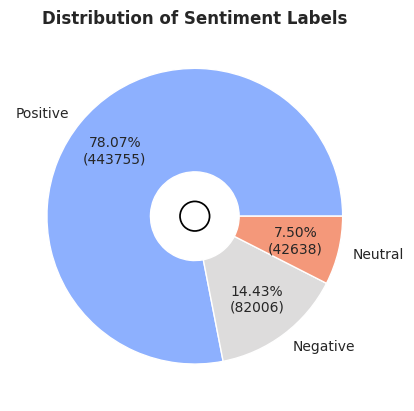

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
colors = sns.color_palette("coolwarm", len(sentiment_counts))  # Dải màu coolwarm từ seaborn
fig, ax = plt.subplots()
ax.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct=lambda p: f'{p:.2f}%\n({int(p * sentiment_counts.sum() / 100)})',
    wedgeprops=dict(width=0.7),
    textprops=dict(size=10),
    pctdistance=0.7,
    colors=colors  # Sử dụng dải màu đã chọn
)
center_circle = plt.Circle((0, 0), 0.1, color='black', fc='white', linewidth=1.25)
fig.gca().add_artist(center_circle)
plt.title("Distribution of Sentiment Labels", weight="bold")
plt.show()

#### Sentiments vs Helpful rate

In [ ]:
pd.DataFrame(df.groupby('sentiment')['helpful_rate'].mean())

,helpful_rate
sentiment,
Negative,0.395373
Neutral,0.355299
Positive,0.415294


From the table we can see that the mean of of helpful rate is higher for any negative reviews than neutral and positive reviews. These mean value might have been influenced by the 0 values in helpful rates. Lets check how it is distributed through violin plot

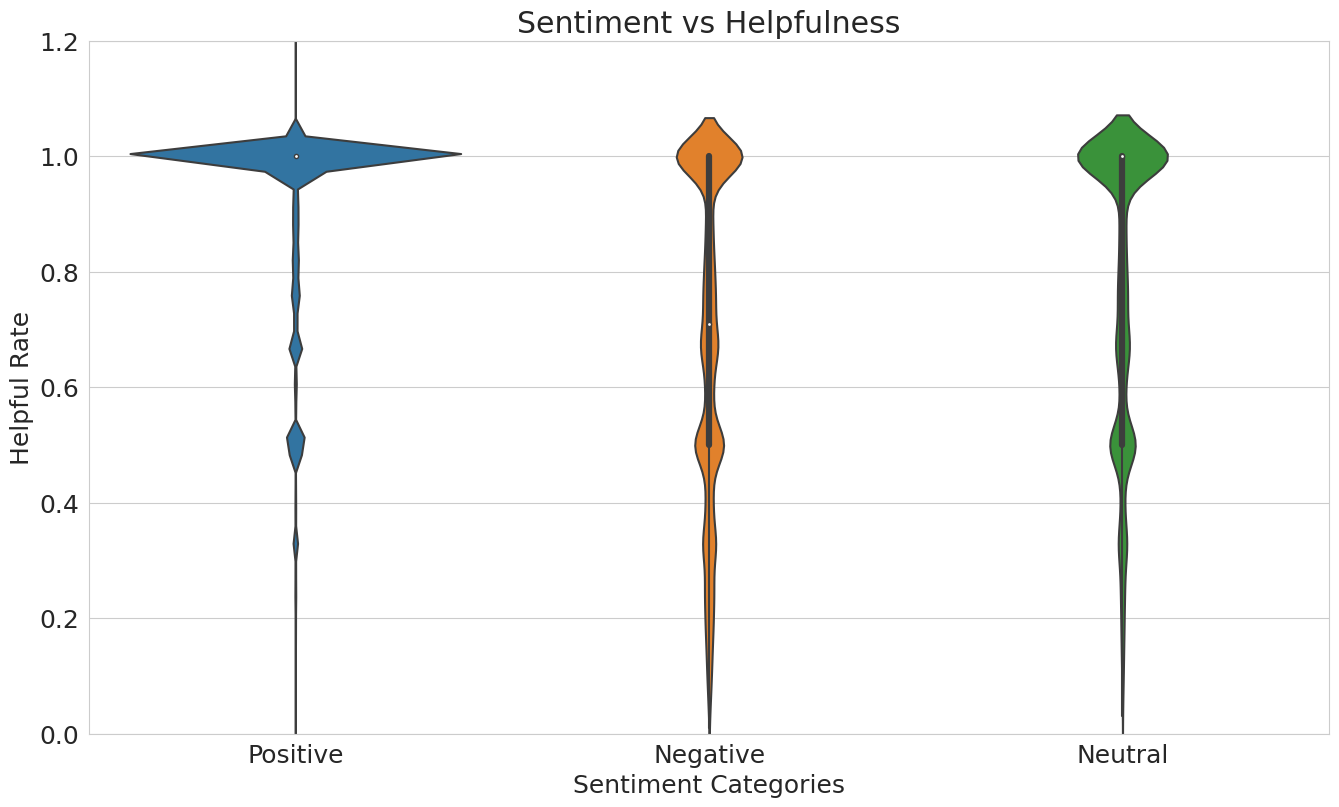

In [ ]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(16, 9))

# Tạo dataframe và loại bỏ các bản ghi có helpful_rate = 0.00
senti_help = pd.DataFrame(df, columns=['sentiment', 'helpful_rate'])
senti_help = senti_help[senti_help['helpful_rate'] != 0.00]

# Vẽ đồ thị violinplot
sns.violinplot(x=senti_help["sentiment"], y=senti_help["helpful_rate"])
plt.title('Sentiment vs Helpfulness')
plt.xlabel('Sentiment Categories')
plt.ylabel('Helpful Rate')
plt.ylim(0, 1.2)
plt.show()

Insights:

From the plot we can declare that more number of positive reviews are having high helpful rate. We got deceived by the mean value, it's better to look at a plot rather than taking some measures of central tendency under such situation. Our first assumption is correct !

#### Year vs Sentiment count

<Figure size 1000x1000 with 0 Axes>

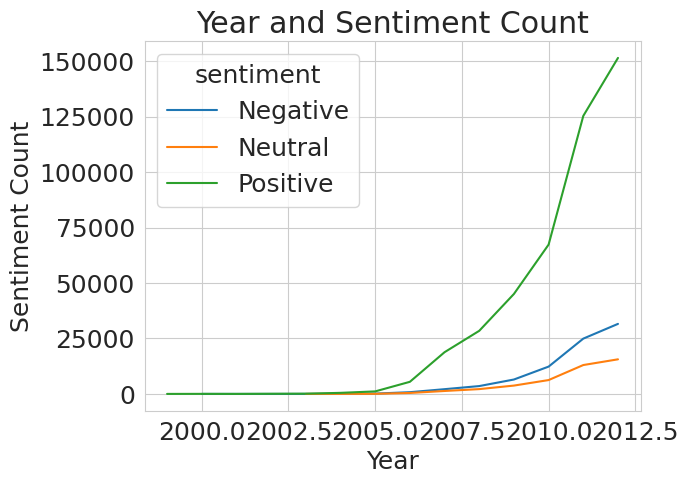

In [ ]:
plt.figure(figsize=(10, 10))
df.groupby(['year', 'sentiment']).size().unstack().plot(legend=True)
plt.title('Year and Sentiment Count')
plt.xlabel('Year')
plt.ylabel('Sentiment Count')
plt.show()

Insights:

From the plot we can clearly see the rise in positive reviews from 2006. Reaching its peak around 2012, All the review rates were dropped at this time. Negative and neutral reviews are very low as compared to the positive reviews. Our second assumption is wrong!

#### Day of month vs Reviews count

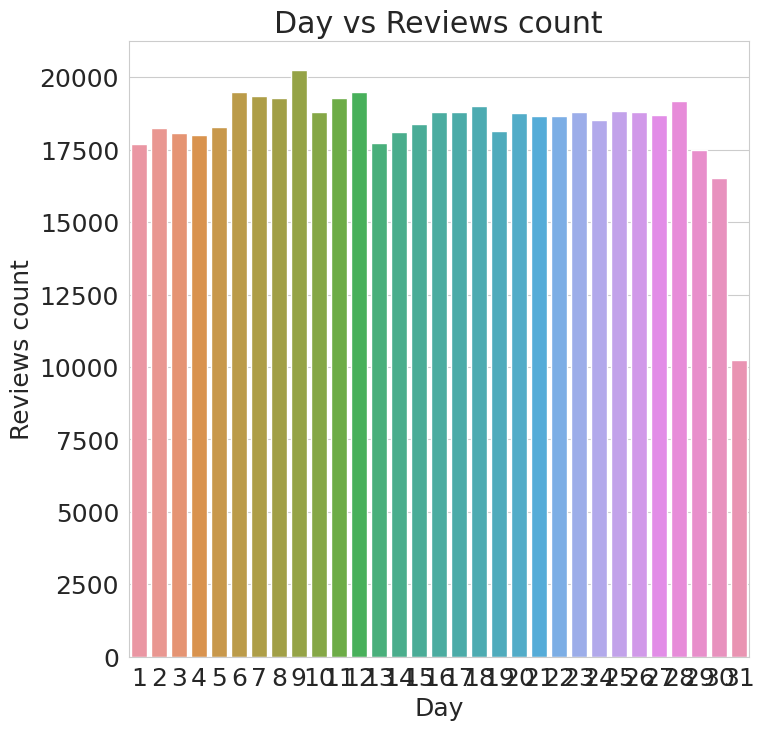

In [ ]:
#Creating a dataframe
day=pd.DataFrame(df.groupby('day')['reviews'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
plt.figure(figsize=(8,8))
sns.barplot(x="day", y="reviews", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

Insights:

The review counts are more or less uniformly distributed.There isn't much variance between the days. But there is a huge drop at the end of month. Our third assumption is wrong ! Never trust your instincts unles you do EDA.

### Creating few more features for text analysis

Now, let's create polarity, review length and word count

Polarity: We use Textblob for for figuring out the rate of sentiment . It is between [-1,1] where -1 is negative and 1 is positive polarity

Review length: length of the review which includes each letters and spaces

Word length: This measures how many words are there in review

In [ ]:
df['polarity'] = df['reviews'].map(lambda text: TextBlob(text).sentiment.polarity)
df['review_len'] = df['reviews'].astype(str).apply(len)
df['word_count'] = df['reviews'].apply(lambda x: len(str(x).split()))

In [ ]:
df.head()

,id,product_id,user_id,score,reviews,sentiment,day,month,year,helpful_rate,polarity,review_len,word_count
0,1,B001E4KFG0,A3SGXH7AUHU8GW,5,good quality dog food bought vitality canned d...,Positive,27,4,2011,1.0,0.600000,178,26
1,2,B00813GRG4,A1D87F6ZCVE5NK,1,not advertised product arrived labeled jumbo s...,Negative,7,9,2012,0.0,-0.033333,155,21
2,3,B000LQOCH0,ABXLMWJIXXAIN,4,delight says confection centuries light pillow...,Positive,18,8,2008,1.0,0.187000,295,42
3,4,B000UA0QIQ,A395BORC6FGVXV,2,cough medicine looking secret ingredient robit...,Negative,13,6,2011,1.0,0.150000,143,20
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,5,great taffy great taffy great price wide assor...,Positive,21,10,2012,0.0,0.526667,95,15


### Sentiment polarity distribution

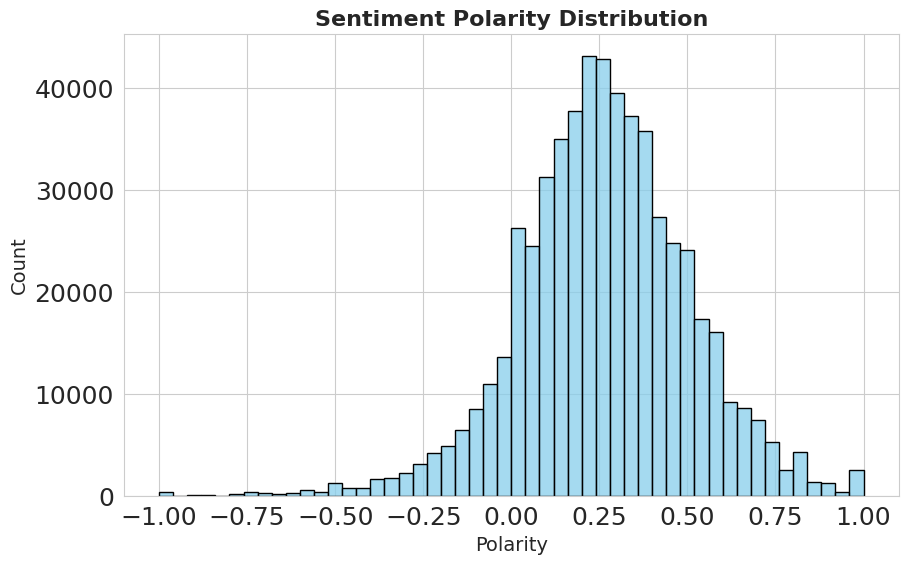

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], bins=50, kde=False, color='skyblue', edgecolor='black')
plt.title('Sentiment Polarity Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Polarity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

Insights:

- We have a lot of positive polarities compared to the negative polarities
- This polarity distributions assures the number of positive reviews we had
- We can say that this polarity is a normally distributed but not standard normal

### Review Rating Distribution

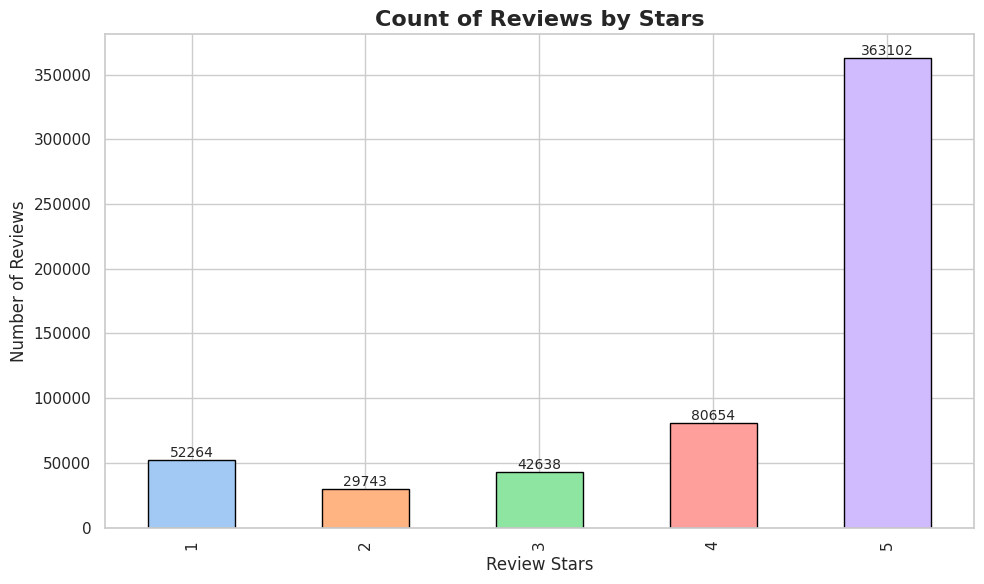

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
barplot = df['score'].value_counts().sort_index().plot(
    kind='bar',
    color=sns.color_palette("pastel"),
    edgecolor='black',
    ax=ax
)
ax.set_title('Count of Reviews by Stars', fontsize=16, fontweight='bold')
ax.set_xlabel('Review Stars', fontsize=12)
ax.set_ylabel('Number of Reviews', fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()


**We have a large number of 5 ratings followed by 4,1,3,2. It's linear in nature **

### Review Text Length Distribution

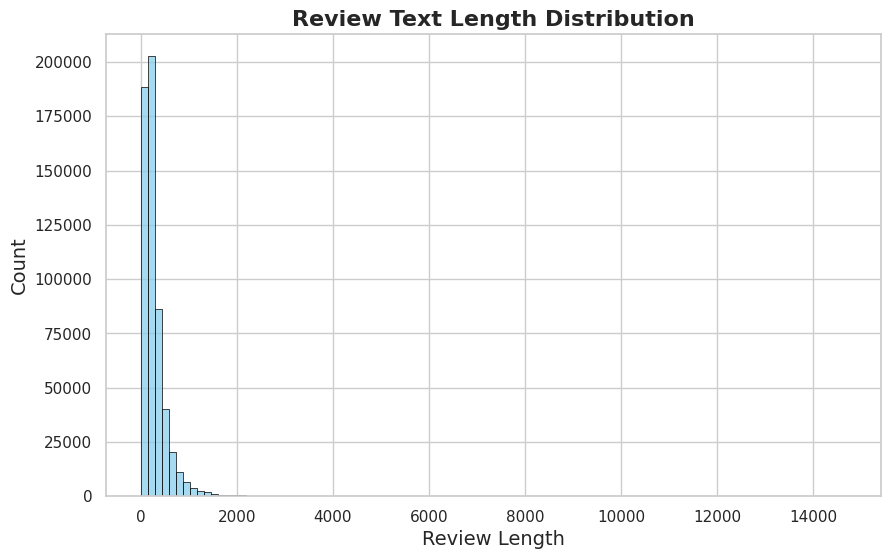

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['review_len'], bins=100, kde=False, color='skyblue', edgecolor='black')
plt.title('Review Text Length Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Review Length', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

We have a right skewed distribution where most of the lengths falls between 0-3000

### Review Text Word Count Distribution

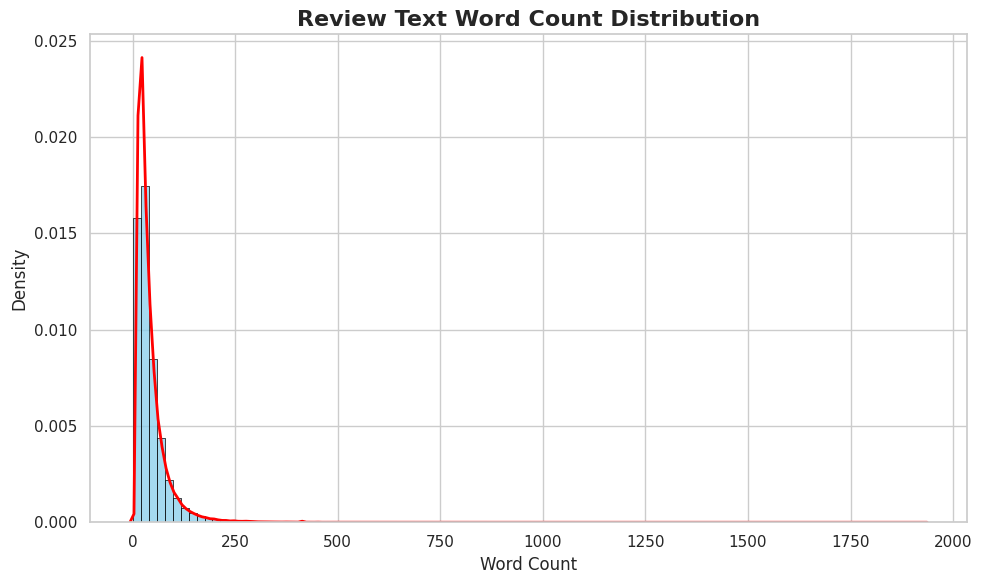

In [ ]:
word_counts = df['word_count'].dropna()
word_counts = word_counts[word_counts > 0]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))

# Histogram
sns.histplot(word_counts,
             bins=100,
             color='skyblue',
             edgecolor='black',
             stat='density')

# KDE line
sns.kdeplot(word_counts,
            color='red',
            linewidth=2)

# Nhãn và tiêu đề
plt.title('Review Text Word Count Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.tight_layout()
plt.show()

We have a right skewed distribution with most of the words falling between 0-250 in a a review

### Word-Cloud for Negative

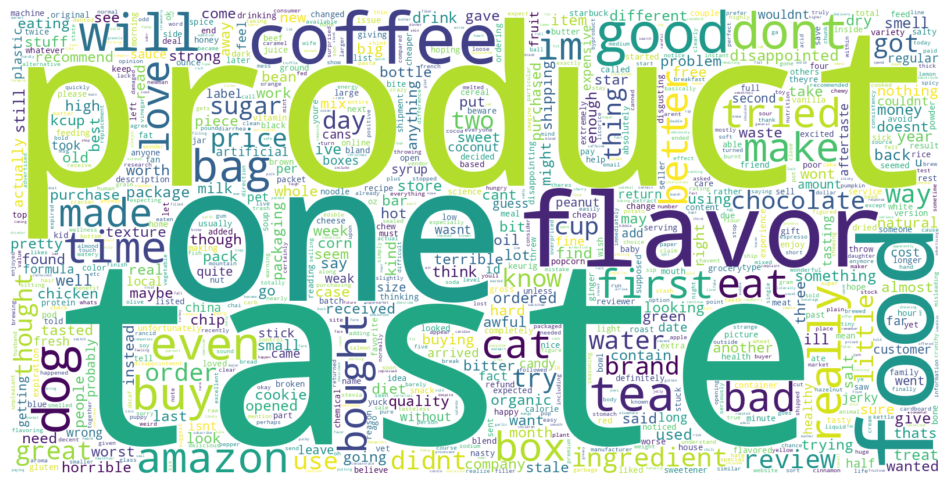

In [ ]:
negative_reviews = df[df['sentiment'] == 'Negative']['reviews']
text = " ".join(negative_reviews.astype(str))
plt.figure(figsize=(12, 12))
wc = WordCloud(max_words=1000, width=1600, height=800, background_color='white', collocations=False).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Word-Cloud for Positive

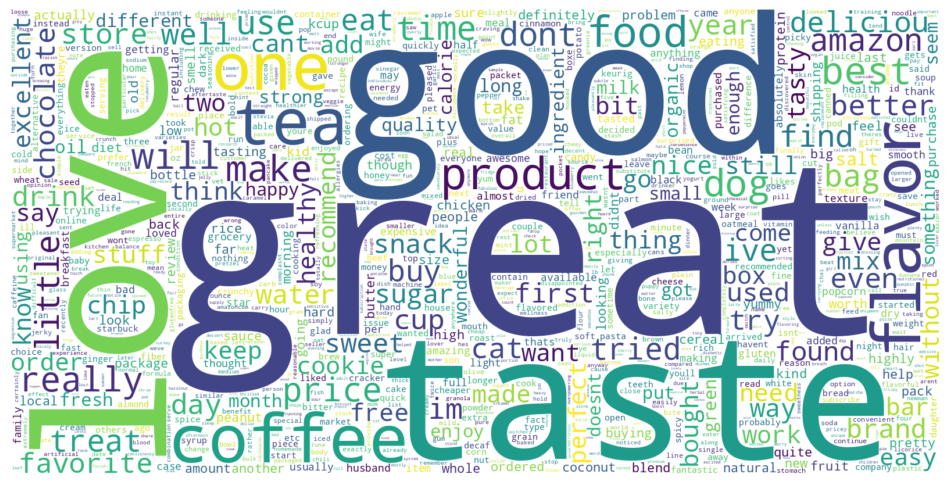

In [ ]:
positive_reviews = df[df['sentiment'] == 'Positive']['reviews']
text = " ".join(positive_reviews.astype(str))
plt.figure(figsize=(12, 12))
wc = WordCloud(max_words=1000, width=1600, height=800, background_color='white', collocations=False).generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

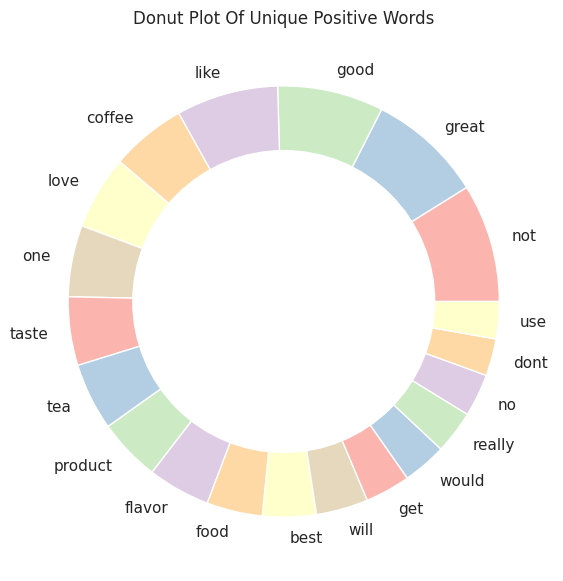

In [ ]:
positive_reviews = df[df['sentiment'] == 'Positive']['reviews'].dropna()
text = " ".join(positive_reviews.astype(str)).lower()

# Tách từ, loại bỏ ký tự đặc biệt
words = re.findall(r'\b\w+\b', text)

# Đếm từ và tạo DataFrame
word_counts = Counter(words)
Unique_Positive = pd.DataFrame(word_counts.most_common(20), columns=['words', 'count'])

plt.figure(figsize=(7, 7))
my_circle = plt.Circle((0,0), 0.7, color='white')

plt.pie(
    Unique_Positive['count'],
    labels=Unique_Positive['words'],
    colors=Pastel1_7.hex_colors[:len(Unique_Positive)]
)

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Donut Plot Of Unique Positive Words')
plt.show()

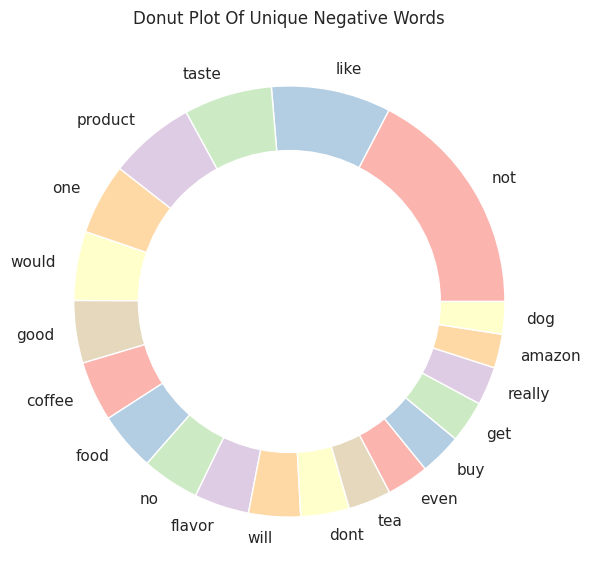

In [ ]:
negative_reviews = df[df['sentiment'] == 'Negative']['reviews'].dropna()
text_negative = " ".join(negative_reviews.astype(str)).lower()

# Tách từ, loại bỏ ký tự đặc biệt
words_negative = re.findall(r'\b\w+\b', text_negative)

# Đếm từ và tạo DataFrame
word_counts_negative = Counter(words_negative)
Unique_Negative = pd.DataFrame(word_counts_negative.most_common(20), columns=['words', 'count'])

# Vẽ Donut Plot cho Negative Sentiment
plt.figure(figsize=(7, 7))
my_circle = plt.Circle((0,0), 0.7, color='white')

plt.pie(
    Unique_Negative['count'],
    labels=Unique_Negative['words'],
    colors=Pastel1_7.hex_colors[:len(Unique_Negative)]
)

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Donut Plot Of Unique Negative Words')
plt.show()

# Baseline model: Naive Bayes Classifier

## 1. Encoding Labels

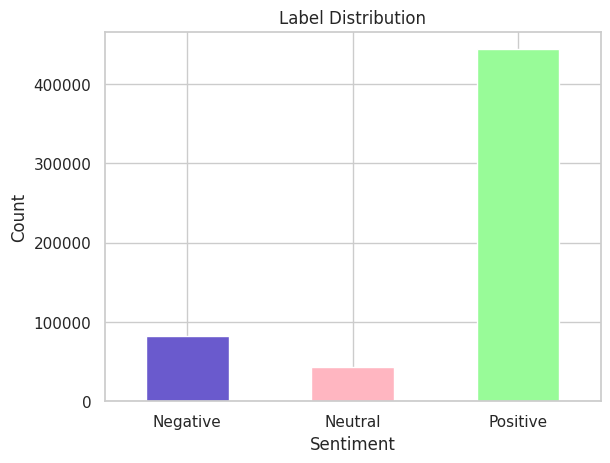

In [ ]:
# Encode sentiments
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
df['label'] = df['sentiment'].map(label_mapping)

# Display label distribution with harmonious colors
colors = ['#6a5acd', '#ffb6c1', '#98fb98']

df['label'].value_counts().sort_index().plot(kind='bar', color=colors)
plt.title('Label Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Negative', 'Neutral', 'Positive'], rotation=0)
plt.show()

## 2. Splitting the Dataset

In [ ]:
# Define features and labels
X = df['reviews']
y = df['label']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

## 3. One hot Encoding

In [ ]:
y_train_le = y_train.copy()
y_valid_le = y_valid.copy()
y_test_le = y_test.copy()

In [ ]:
ohe = preprocessing.OneHotEncoder()
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1)).toarray()
y_valid = ohe.fit_transform(np.array(y_valid).reshape(-1, 1)).toarray()
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

In [ ]:
print(f"TRAINING DATA: {X_train.shape[0]}\nVALIDATION DATA: {X_valid.shape[0]}\nTESTING DATA: {X_test.shape[0]}" )

TRAINING DATA: 397880
VALIDATION DATA: 85260
TESTING DATA: 85261


## 4. Vectorization

In [ ]:
cv = CountVectorizer()
tfidf = TfidfTransformer()
X_train_cv = cv.fit_transform(X_train)
X_train_tf = tfidf.fit_transform(X_train_cv)

## 5. Model

In [ ]:
y_train = np.argmax(y_train, axis=1)
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tf, y_train)

MultinomialNB()

In [ ]:
X_test_counts = cv.transform(X_test)
X_test_tf = tfidf.transform(X_test_counts)
nb_pred = nb_clf.predict(X_test_tf)

In [ ]:
print('\tClassification Report for Naive Bayes:\n\n', classification_report(y_test_le, nb_pred, target_names=['Negative', 'Neutral', 'Positive']))

	Classification Report for Naive Bayes:

               precision    recall  f1-score   support

    Negative       0.96      0.07      0.13     12301
     Neutral       0.89      0.00      0.00      6396
    Positive       0.79      1.00      0.88     66564

    accuracy                           0.79     85261
   macro avg       0.88      0.36      0.34     85261
weighted avg       0.82      0.79      0.71     85261



# BERT Sentiment Analysis

## 1. Train - Validation - Test split

In [ ]:
X = df['reviews'].values
y = df['sentiment'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

As seen before, we oversample the text to the majority class.

In [ ]:
ros = RandomOverSampler()
X_train_os, y_train_os = ros.fit_resample(np.array(X_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

In [ ]:
X_train_os = X_train_os.flatten()
y_train_os = y_train_os.flatten()

In [ ]:
(unique, counts) = np.unique(y_train_os, return_counts=True)
np.asarray((unique, counts)).T

array([['Negative', 284003],
       ['Neutral', 284003],
       ['Positive', 284003]], dtype=object)

## 2. Tokenization

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def bert_tokenizer(data):
    input_ids = []
    attention_masks = []
    for sent in data:
        encoded_sent = tokenizer.encode_plus(
            text=sent,
            add_special_tokens=True,         # Add `[CLS]` and `[SEP]`
            max_length=MAX_LEN,              # Max length
            padding='max_length',            # NEW: Padding cách mới
            truncation=True,                 # NEW: Tự động cắt nếu quá dài
            return_attention_mask=True,      # Return attention mask
            return_tensors='pt'               # NEW: Trả tensor luôn cho nhanh
        )
        input_ids.append(encoded_sent['input_ids'])
        attention_masks.append(encoded_sent['attention_mask'])

    # Stack tensors lại
    input_ids = torch.cat(input_ids, dim=0)
    attention_masks = torch.cat(attention_masks, dim=0)

    return input_ids, attention_masks


In [ ]:
encoded_amazon = [tokenizer.encode(sent, add_special_tokens=True) for sent in X_train]

# Find the longest tokenized amazon
max_len = max([len(sent) for sent in encoded_amazon])
print('Max length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (1077 > 512). Running this sequence through the model will result in indexing errors


Max length:  2552


In [ ]:
MAX_LEN = 128

In [ ]:
train_inputs, train_masks = bert_tokenizer(X_train_os)
val_inputs, val_masks = bert_tokenizer(X_valid)
test_inputs, test_masks = bert_tokenizer(X_test)

In [ ]:
# Khởi tạo LabelEncoder
label_encoder = LabelEncoder()
y_train_os = label_encoder.fit_transform(y_train_os)
y_valid = label_encoder.transform(y_valid)
y_test = label_encoder.transform(y_test)

In [ ]:
train_labels = torch.from_numpy(y_train_os).long()
val_labels = torch.from_numpy(y_valid).long()
test_labels = torch.from_numpy(y_test).long()

In [ ]:
batch_size = 32

In [ ]:
# Create the DataLoader for our training set
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set
val_data = TensorDataset(val_inputs, val_masks, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)

# Create the DataLoader for our test set
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

## 3.  Modeling

In [ ]:
class Bert_Classifier(nn.Module):
    def __init__(self, freeze_bert=False):
        super(Bert_Classifier, self).__init__()
        # Specify hidden size of BERT, hidden size of the classifier, and number of labels
        n_input = 768
        n_hidden = 50
        n_output = 5

        # Instantiate BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # Instantiate the classifier (a fully connected layer followed by a ReLU activation and another fully connected layer)
        self.classifier = nn.Sequential(
            nn.Linear(n_input, n_hidden),
            nn.ReLU(),
            nn.Linear(n_hidden, n_output)
        )

        # Freeze the BERT model weights if freeze_bert is True (useful for feature extraction without fine-tuning)
        if freeze_bert:
            for param in self.bert.parameters():
                param.requires_grad = False

    def forward(self, input_ids, attention_mask):
        # Feed input data (input_ids and attention_mask) to BERT
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask)

        # Extract the last hidden state of the `[CLS]` token from the BERT output (useful for classification tasks)
        last_hidden_state_cls = outputs[0][:, 0, :]

        # Feed the extracted hidden state to the classifier to compute logits
        logits = self.classifier(last_hidden_state_cls)

        return logits

In [ ]:
# Function for initializing the BERT Classifier model, optimizer, and learning rate scheduler
def initialize_model(epochs=4):
    # Instantiate Bert Classifier
    bert_classifier = Bert_Classifier(freeze_bert=False)

    bert_classifier.to(device)

    # Set up optimizer
    optimizer = AdamW(bert_classifier.parameters(),
                      lr=5e-5,    # learning rate, set to default value
                      eps=1e-8    # decay, set to default value
                      )

    # Calculate total number of training steps
    total_steps = len(train_dataloader) * epochs

    # Define the learning rate scheduler
    scheduler = get_linear_schedule_with_warmup(optimizer,
                                                num_warmup_steps=0, # Default value
                                                num_training_steps=total_steps)
    return bert_classifier, optimizer, scheduler

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
EPOCHS=4

In [ ]:
bert_classifier, optimizer, scheduler = initialize_model(epochs=EPOCHS)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

## 4. Training

In [ ]:
# Define Cross entropy Loss function for the multiclass classification task
loss_fn = nn.CrossEntropyLoss()

def bert_train(model, train_dataloader, val_dataloader=None, epochs=4, evaluation=False, max_batches=1500):

    print("Start training...\n")
    for epoch_i in range(epochs):
        print("-"*10)
        print(f"Epoch : {epoch_i+1}")
        print("-"*10)
        print("-"*38)
        print(f"{'BATCH NO.':^9} | {'TRAIN LOSS':^12} | {'ELAPSED (s)':^9}")
        print("-"*38)

        t0_epoch, t0_batch = time.time(), time.time()

        total_loss, batch_loss, batch_counts = 0, 0, 0

        model.train()

        for step, batch in enumerate(train_dataloader):
            if step >= 1500:
                print(f"Reached {step} batches, stopping training early.")
                break

            batch_counts += 1

            b_input_ids, b_attn_mask, b_labels = tuple(t.to(device) for t in batch)

            model.zero_grad()
            logits = model(b_input_ids, b_attn_mask)
            loss = loss_fn(logits, b_labels)
            batch_loss += loss.item()
            total_loss += loss.item()

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

            optimizer.step()
            scheduler.step()

            if (step % 100 == 0 and step != 0) or (step == len(train_dataloader) - 1):
                time_elapsed = time.time() - t0_batch
                print(f"{step:^9} | {batch_loss / batch_counts:^12.6f} | {time_elapsed:^9.2f}")
                batch_loss, batch_counts = 0, 0
                t0_batch = time.time()

        avg_train_loss = total_loss / step  # Chia cho số batch thực tế (không phải tổng train_loader)

        ### EVALUATION ###
        model.eval()

        val_accuracy = []
        val_loss = []

        for batch in val_dataloader:
            batch_input_ids, batch_attention_mask, batch_labels = tuple(t.to(device) for t in batch)

            with torch.no_grad():
                logits = model(batch_input_ids, batch_attention_mask)

            loss = loss_fn(logits, batch_labels)
            val_loss.append(loss.item())

            preds = torch.argmax(logits, dim=1).flatten()
            accuracy = (preds == batch_labels).cpu().numpy().mean() * 100
            val_accuracy.append(accuracy)

        val_loss = np.mean(val_loss)
        val_accuracy = np.mean(val_accuracy)

        time_elapsed = time.time() - t0_epoch
        print("-"*61)
        print(f"{'AVG TRAIN LOSS':^14} | {'VAL LOSS':^10} | {'VAL ACCURACY (%)':^17} | {'ELAPSED (s)':^9}")
        print("-"*61)
        print(f"{avg_train_loss:^14.6f} | {val_loss:^10.6f} | {val_accuracy:^17.2f} | {time_elapsed:^9.2f}")
        print("-"*61)
        print("\n")

    print("Training complete!")


In [ ]:
bert_train(bert_classifier, train_dataloader, val_dataloader, epochs=EPOCHS)

Start training...

----------
Epoch : 1
----------
--------------------------------------
BATCH NO. |  TRAIN LOSS  | ELAPSED (s)
--------------------------------------
   100    |   0.897321   |   61.72  
   200    |   0.706152   |   69.48  
   300    |   0.632290   |   71.15  
   400    |   0.620585   |   71.57  
   500    |   0.589147   |   71.54  
   600    |   0.574227   |   71.02  
   700    |   0.560367   |   71.54  
   800    |   0.558984   |   71.68  
   900    |   0.547631   |   71.50  
  1000    |   0.532802   |   71.50  
  1100    |   0.530689   |   71.24  
  1200    |   0.518934   |   71.28  
  1300    |   0.516952   |   71.23  
  1400    |   0.493650   |   71.14  
Reached 1500 batches, stopping training early.
-------------------------------------------------------------
AVG TRAIN LOSS |  VAL LOSS  | VAL ACCURACY (%)  | ELAPSED (s)
-------------------------------------------------------------
   0.587016    |  0.309610  |       87.80       |  1745.27 
---------------------

In [ ]:
torch.save(bert_classifier, "bert_classifier_full.pth")

In [ ]:
def bert_predict(model, test_dataloader):

    # Define empty list to host the predictions
    preds_list = []

    # Put the model into evaluation mode
    model.eval()

    for batch in test_dataloader:
        batch_input_ids, batch_attention_mask = tuple(t.to(device) for t in batch)[:2]

        # Avoid gradient calculation of tensors by using "no_grad()" method
        with torch.no_grad():
            logit = model(batch_input_ids, batch_attention_mask)

        # Get index of highest logit
        pred = torch.argmax(logit,dim=1).cpu().numpy()
        # Append predicted class to list
        preds_list.extend(pred)

    return preds_list

In [ ]:
bert_preds = bert_predict(bert_classifier, test_dataloader)

In [ ]:
print('Classification Report for BERT :\n', classification_report(y_test, bert_preds, target_names=['Negative','Positive','Neutral']))

Classification Report for BERT :
               precision    recall  f1-score   support

    Negative       0.81      0.84      0.83     16401
    Positive       0.44      0.73      0.55      8528
     Neutral       0.98      0.91      0.95     88752

    accuracy                           0.89    113681
   macro avg       0.74      0.83      0.77    113681
weighted avg       0.92      0.89      0.90    113681



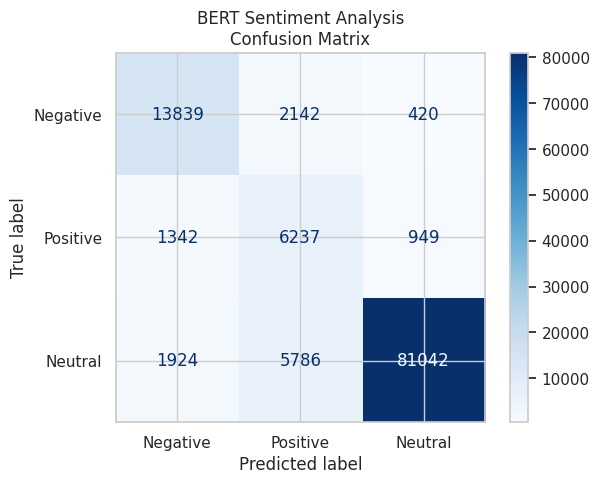

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title, target_names=None):
    # Tính toán confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Hiển thị confusion matrix bằng ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
    disp.plot(cmap='Blues')

    # Đặt tiêu đề và hiển thị đồ thị
    plt.title(title)
    plt.show()

plot_confusion_matrix(y_test, bert_preds, 'BERT Sentiment Analysis\nConfusion Matrix', target_names=['Negative', 'Positive', 'Neutral'])

# Demo Gradio

In [ ]:
!pip -qq install gradio

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.6/59.6 MB 29.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.6/95.6 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 96.3 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.7/72.7 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.5 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import numpy as np
import random

# Load model and tokenizer
print("Loading sentiment analysis model...")
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
print("Model loaded successfully!")

# Function to analyze sentiment
def analyze_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)

    with torch.no_grad():
        outputs = model(**inputs)
        scores = torch.softmax(outputs.logits, dim=1).numpy()[0]

    sentiments = ["Negative", "Neutral", "Positive"]
    sentiment_scores = dict(zip(sentiments, scores))

    sentiment = max(sentiment_scores, key=sentiment_scores.get)
    confidence = sentiment_scores[sentiment]

    return sentiment, confidence

# Function to generate appropriate response based on sentiment
def get_response(sentiment, product_name="product"):
    if sentiment == "Positive":
        responses = [
            f"We're thrilled to hear you're enjoying our {product_name}! Thank you for your positive feedback.",
            f"Wonderful! We're so glad you had a great experience with our {product_name}.",
            f"Thank you for your kind words about our {product_name}. We work hard to provide the best experience for our customers.",
            f"We appreciate your positive review of our {product_name}. It means a lot to us!",
            f"Excellent! We're happy to hear that our {product_name} met your expectations."
        ]
    elif sentiment == "Neutral":
        responses = [
            f"Thank you for your feedback on our {product_name}. Is there anything specific we could improve?",
            f"We appreciate you taking the time to review our {product_name}. Would you like to share more details about your experience?",
            f"Thank you for trying our {product_name}. We'd love to hear more about what would make your experience better.",
            f"We value your balanced feedback on our {product_name}. Please let us know if you have any suggestions.",
            f"Thanks for sharing your thoughts on our {product_name}. How could we enhance your experience next time?"
        ]
    else:  # Negative
        responses = [
            f"We're sorry to hear about your experience with our {product_name}. We'd like to make things right.",
            f"Thank you for bringing this to our attention. We apologize for any inconvenience with our {product_name}.",
            f"We apologize that our {product_name} didn't meet your expectations. Could you provide more details so we can address your concerns?",
            f"We're sorry you weren't satisfied with our {product_name}. Your feedback helps us improve.",
            f"We appreciate your honest feedback about our {product_name}. We'd like to understand more about what went wrong."
        ]

    return random.choice(responses)

# Function to generate customer engagement suggestions
def get_engagement_suggestion(sentiment, product_name="product"):
    if sentiment == "Positive":
        suggestions = [
            f"Would you like to join our loyalty program for exclusive {product_name} updates and discounts?",
            f"Share your experience on social media and tag us to get a 10% discount on your next purchase!",
            f"Consider trying our new line of products that complement your {product_name} experience.",
            f"We'd love if you could leave a review on our website to help other customers.",
            f"Sign up for our newsletter to stay updated on new features for your {product_name}!"
        ]
    elif sentiment == "Neutral":
        suggestions = [
            f"Here's a 5% discount code for your next purchase: THANKYOU5",
            f"Would you like to schedule a quick demo to discover more features of your {product_name}?",
            f"Check out our tutorial videos to get the most out of your {product_name}.",
            f"We have a detailed FAQ section that might address any questions about your {product_name}.",
            f"Our customer support team is available 24/7 if you need any assistance with your {product_name}."
        ]
    else:  # Negative
        suggestions = [
            f"Please accept this 15% discount code as an apology: SORRY15",
            f"We'd like to offer you a free consultation with our product specialist to resolve any issues.",
            f"Our technical support team can help troubleshoot any problems - reply with 'HELP' to connect.",
            f"We can arrange a replacement if your {product_name} isn't functioning properly.",
            f"Your feedback is valuable - we'd like to offer you early access to our improved version when available."
        ]

    return random.choice(suggestions)


# Main function to process feedback and generate response
def process_feedback(feedback, product_name):
    if not feedback:
        return "Please enter your feedback."

    # Analyze sentiment
    sentiment, confidence = analyze_sentiment(feedback)

    # Generate response based on sentiment
    response = get_response(sentiment, product_name if product_name else "product")

    # Generate engagement suggestion
    engagement = get_engagement_suggestion(sentiment, product_name if product_name else "product")

    # Sentiment icons
    sentiment_icon = {
        "Positive": "😊",
        "Neutral": "😐",
        "Negative": "😔"
    }

    sentiment_color = {
        "Positive": "#10b981",  # Green
        "Neutral": "#6b7280",   # Gray
        "Negative": "#ef4444"   # Red
    }

    # HTML output with sentiment icon and engagement suggestion
    output_html = f"""
    <div style="padding: 20px; border-radius: 10px; background-color: #f8f9fa; margin-bottom: 20px;">
        <h3>Feedback Analysis Results</h3>
        <div style="display: flex; align-items: center; gap: 10px; margin-bottom: 15px;">
            <div style="font-size: 3.5rem;">{sentiment_icon[sentiment]}</div>
            <div>
                <p style="font-size: 1.2rem; margin: 0;">Detected sentiment: <span style="color: {sentiment_color[sentiment]}; font-weight: bold;">{sentiment}</span></p>
                <p style="margin: 0;">Confidence: {confidence:.2f}</p>
            </div>
        </div>

        <div style="margin-top: 20px; padding: 15px; background-color: white; border-radius: 10px; border-left: 5px solid {sentiment_color[sentiment]};">
            <h4>Our Response:</h4>
            <p>{response}</p>
        </div>

        <div style="margin-top: 15px; padding: 15px; background-color: white; border-radius: 10px; border-left: 5px solid #3b82f6;">
            <h4>Next Steps:</h4>
            <p>{engagement}</p>
        </div>
    </div>
    """

    return output_html

# Create Gradio interface
with gr.Blocks(css="""
    .gradio-container {
        background-color: #f5f7f9;
    }
    .container {
        max-width: 800px;
        margin: 0 auto;
    }
    .header {
        text-align: center;
        margin-bottom: 30px;
        padding: 20px;
        background-color: #ffffff;
        border-radius: 10px;
        box-shadow: 0 4px 6px rgba(0, 0, 0, 0.05);
    }
    .footer {
        text-align: center;
        margin-top: 30px;
        font-size: 0.9em;
        color: #6b7280;
    }
""") as demo:

    # Header
    gr.HTML("""
    <div class="header">
        <h1>💬 Customer Feedback Analysis</h1>
        <p>Share your product experience and receive an automated response based on sentiment analysis</p>
    </div>
    """)

    with gr.Row():
        with gr.Column():
            # Product name input
            product_name = gr.Textbox(
                label="Product Name",
                placeholder="Enter product name...",
                value="product"
            )

            # Feedback input
            feedback = gr.Textbox(
                label="Your Feedback",
                placeholder="Share your experience with our product...",
                lines=5
            )

            # Submit button
            submit_btn = gr.Button("Submit Feedback", variant="primary")

    # Output area for response
    output = gr.HTML(label="Response")

    # Set up event handling
    submit_btn.click(
        fn=process_feedback,
        inputs=[feedback, product_name],
        outputs=output
    )

    # Example inputs
    gr.Examples(
        examples=[
            ["This product is amazing! It works perfectly and has improved my daily routine significantly.", "Smart Watch"],
            ["The delivery was on time but the product quality is just okay.", "Bluetooth Speaker"],
            ["I'm very disappointed with this purchase. It stopped working after a week and customer service was unhelpful.", "Vacuum Cleaner"],
            ["I love how intuitive this app is. The interface is clean and everything works smoothly!", "Mobile App"],
            ["The product arrived damaged and customer support has been unresponsive for days.", "Home Furniture"]
        ],
        inputs=[feedback, product_name]
    )

    # Footer with instructions
    gr.HTML("""
    <div class="footer">
        <p>How to use:</p>
        <ol style="text-align: left; display: inline-block;">
            <li>Enter the product name (optional)</li>
            <li>Write your feedback in the text box</li>
            <li>Click "Submit Feedback" to get an analysis and response</li>
        </ol>
    </div>
    """)

# Launch the app
if __name__ == "__main__":
    demo.launch()

Loading sentiment analysis model...
Model loaded successfully!
* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://7930596dab400962b9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
